In [ ]:
!pip install qiskit
!pip install qiskit-aer


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 88.8 MB/s eta 0:00:00


In [ ]:
# Gerekli kütüphaneler
from qiskit import QuantumCircuit, transpile
from qiskit.visualization import plot_histogram
from qiskit_aer import Aer

In [ ]:
# --- "Selamünaleyküm, Quantum Dünyası!" Devresi ---
# 1. Devreyi Oluştur: 1 kübit ve 1 klasik bit (ölçüm sonucu için)
qc = QuantumCircuit(1, 1)

In [ ]:
# 2. Kapıları Ekle: Kübiti süperpozisyona sok
qc.h(0) # 0. kübite Hadamard kapısı uygula

In [ ]:
# 3. Ölçüm Yap: Kuantum bitini klasik bite ölç
qc.measure(0, 0)

In [ ]:
# 4. Devreyi Çizdir: Ne yaptığımızı görelim
print("Oluşturulan Kuantum Devresi:")
print(qc.draw())

Oluşturulan Kuantum Devresi:
     ┌───┐┌─┐
  q: ┤ H ├┤M├
     └───┘└╥┘
c: 1/══════╩═
           0 


In [ ]:
# 5. Simülatörü Ayarla ve Çalıştır
simulator = Aer.get_backend('qasm_simulator')
transpiled_qc = transpile(qc, simulator)
job = simulator.run(transpiled_qc, shots=1024) # Devreyi 1024 kez çalıştır
result = job.result()
counts = result.get_counts(qc)


Ölçüm Sonuçları (Counts): {'0': 530, '1': 494}


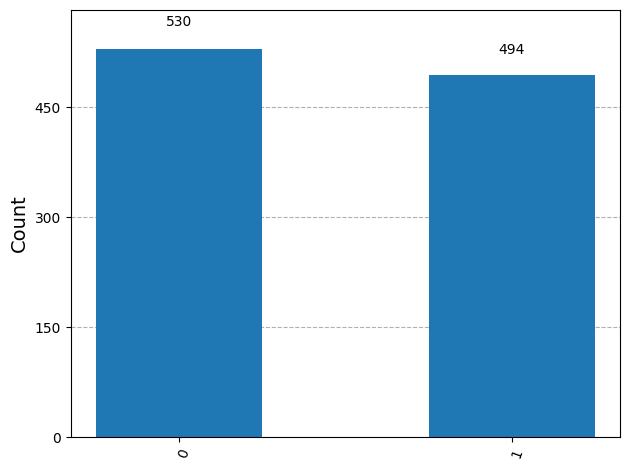

In [ ]:
# 6. Sonuçları Görselleştir
print("\nÖlçüm Sonuçları (Counts):", counts)
plot_histogram(counts)

# feature map oluşturalım

In [ ]:
from qiskit.circuit.library import ZZFeatureMap
# 4 özellikli veri için bir feature map oluşturalım
feature_map = ZZFeatureMap(feature_dimension=4, reps=1)
# Bir veri noktası bağlayalım
data_point = [5.1, 3.5, 1.4, 0.2]
circuit = feature_map.assign_parameters(data_point)
print("\nIris verisiyle oluşturulan Feature Map devresi:")
print(circuit.decompose().draw())


Iris verisiyle oluşturulan Feature Map devresi:
     ┌───┐┌─────────┐                                                         »
q_0: ┤ H ├┤ P(10.2) ├──■─────────────────■────■──────────────────■─────────■──»
     ├───┤└─┬──────┬┘┌─┴─┐┌───────────┐┌─┴─┐  │                  │         │  »
q_1: ┤ H ├──┤ P(7) ├─┤ X ├┤ P(1.4038) ├┤ X ├──┼──────────────────┼────■────┼──»
     ├───┤ ┌┴──────┴┐└───┘└───────────┘└───┘┌─┴─┐┌────────────┐┌─┴─┐┌─┴─┐  │  »
q_2: ┤ H ├─┤ P(2.8) ├───────────────────────┤ X ├┤ P(-6.8215) ├┤ X ├┤ X ├──┼──»
     ├───┤ ├────────┤                       └───┘└────────────┘└───┘└───┘┌─┴─┐»
q_3: ┤ H ├─┤ P(0.4) ├────────────────────────────────────────────────────┤ X ├»
     └───┘ └────────┘                                                    └───┘»
«                                                                            
«q_0: ─────────────────────■─────────────────────────────────────────────────
«                          │                                               

/tmp/ipython-input-1742400564.py:3: DeprecationWarning: The class ``qiskit.circuit.library.data_preparation._zz_feature_map.ZZFeatureMap`` is deprecated as of Qiskit 2.1. It will be removed in Qiskit 3.0. Use the zz_feature_map function as a replacement. Note that this will no longer return a BlueprintCircuit, but just a plain QuantumCircuit.
  feature_map = ZZFeatureMap(feature_dimension=4, reps=1)


In [ ]:
from qiskit.circuit.library import EfficientSU2
# 4 kübit için bir PQC/Ansatz oluşturalım
ansatz = EfficientSU2(num_qubits=4, reps=2)
print("\nÖğrenmeye hazır PQC (Ansatz) devresi:")
print(ansatz.decompose().draw())
print(f"\nBu devrede {ansatz.num_parameters} adet eğitilebilir parametre var.")


Öğrenmeye hazır PQC (Ansatz) devresi:
     ┌──────────┐┌──────────┐                                ┌──────────┐»
q_0: ┤ Ry(θ[0]) ├┤ Rz(θ[4]) ├────────────────────────■───────┤ Ry(θ[8]) ├»
     ├──────────┤├──────────┤                      ┌─┴─┐     ├──────────┤»
q_1: ┤ Ry(θ[1]) ├┤ Rz(θ[5]) ├───────────■──────────┤ X ├─────┤ Ry(θ[9]) ├»
     ├──────────┤├──────────┤         ┌─┴─┐    ┌───┴───┴───┐┌┴──────────┤»
q_2: ┤ Ry(θ[2]) ├┤ Rz(θ[6]) ├──■──────┤ X ├────┤ Ry(θ[10]) ├┤ Rz(θ[14]) ├»
     ├──────────┤├──────────┤┌─┴─┐┌───┴───┴───┐├───────────┤└───────────┘»
q_3: ┤ Ry(θ[3]) ├┤ Rz(θ[7]) ├┤ X ├┤ Ry(θ[11]) ├┤ Rz(θ[15]) ├─────────────»
     └──────────┘└──────────┘└───┘└───────────┘└───────────┘             »
«     ┌───────────┐                          ┌───────────┐┌───────────┐
«q_0: ┤ Rz(θ[12]) ├───────────────────■──────┤ Ry(θ[16]) ├┤ Rz(θ[20]) ├
«     ├───────────┤                 ┌─┴─┐    ├───────────┤├───────────┤
«q_1: ┤ Rz(θ[13]) ├──────■──────────┤ X ├────┤ Ry(θ[17]) ├┤ Rz(θ[21]) 

/tmp/ipython-input-500328234.py:3: DeprecationWarning: The class ``qiskit.circuit.library.n_local.efficient_su2.EfficientSU2`` is deprecated as of Qiskit 2.1. It will be removed in Qiskit 3.0. Use the function qiskit.circuit.library.efficient_su2 instead.
  ansatz = EfficientSU2(num_qubits=4, reps=2)
